# MNIST Dataset

<img src="https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png" title="MNIST dataset" align="center"/>



# Problem
Classify handwritten digits from 0 - 9. <br>
Each image is 28x28 pixels

<img src="https://corochann.com/wp-content/uploads/2017/02/mnist_plot.png" title="" align="center"/>


# Understanding the data

In [ ]:
# MNIST data is present in the keras library. You may load it from there
from tensorflow import keras
from keras.datasets import mnist
(train_samples, train_labels), (test_samples, test_labels) = mnist.load_data()
# Training samples 

### Shape of Data

In [ ]:
print(train_samples.shape)
print(train_labels.shape)
print(test_samples.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


### Range of Values

In [ ]:
import numpy as np
np.amax(train_samples) # Max value

255

In [ ]:
np.amin(train_samples) # Min Value

0

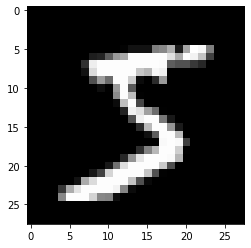

Label of image is 5


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

pixels = train_samples[0] # Shape (28, 28)
plt.imshow(pixels, cmap='gray')
plt.show()
print('Label of image is', train_labels[0])

# Data Preparation

### Normalize inputs to (0, 1)

In [ ]:
# Convert data type from uint8 to float32
train_samples = train_samples.astype('float32')
test_samples = test_samples.astype('float32')

In [ ]:
# Normalize inputs to (0,1)
train_samples = train_samples/255.
test_samples = test_samples/255.
np.amax(train_samples) # max value has become 1.0

1.0

In [ ]:
## Reshape input to be a column vector
train_samples = train_samples.reshape(train_samples.shape[0], 28*28)
test_samples = test_samples.reshape(test_samples.shape[0], 28*28)

### Convert outputs to 1-hot vectors
\begin{equation*}
Eg: 5 \rightarrow [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
\end{equation*}

In [ ]:
# keras has a utility function for this
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
# example
train_labels[0] # label = 5

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

# Network Architecture

<img src="https://drive.google.com/uc?id=1m2jgscTgKlvtzj757I9YMJE2sqNXmMMy" title="" align="center" width="50%" height="50%"/>

### Softmax Activation Function
In the Dense (Fully Connected) layer, we use a softmax activation function
\begin{align}
\sigma(x_j) = \frac{e^{x_j}}{\sum_{i}e^{x_i}}
\end{align}

 The softmax function is a function that takes as input a vector of K real numbers, and normalizes it into a probability distribution consisting of K probabilities

Loss is Categorical Crossentropy

\begin{align}
L(t,p) = -\sum_{x}t(x)log(p(x))
\end{align}

where  𝑥  ranges over the elements of the output vector

\begin{align}
t \rightarrow \text{true probability distribution} \\
p \rightarrow \text{predicted probability distribution}
\end{align}
In our case, $t$ is always a delta function. 
For eg., for label = 5,<br>
$t(x) = 1$ if $x = 5$ and 0 otherwise

Weight update Rule

\begin{align}
W' \leftarrow W - \eta\frac{\partial L}{\partial W}
\end{align}

In [ ]:
train_samples.shape

(60000, 784)

In [ ]:
test_labels.shape

(10000, 10)

RESTART

In [ ]:
# MNIST data is present in the keras library. You may load it from there
from tensorflow import keras
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# Training samples 

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
y_train.shape

(60000,)

0


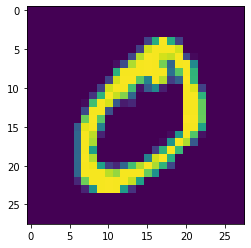

In [ ]:
plt.imshow(X_train[1])
print(y_train[1])

In [ ]:
X_train=X_train/255
X_test=X_test/255

In [ ]:
ann = models.Sequential([
        layers.Flatten(input_shape=(28,28)),
        layers.Dense(300,activation='relu'),
        layers.Dense(100,activation='relu'),
        layers.Dense(10,activation='sigmoid')
      ])
ann.compile(optimizer='SGD',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])T
ann.fit(X_train,y_train,epochs=10)


Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5867 - accuracy: 0.8473
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2811 - accuracy: 0.9204
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2284 - accuracy: 0.9352
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1938 - accuracy: 0.9449
Epoch 5/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.1684 - accuracy: 0.9518
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1485 - accuracy: 0.9577
Epoch 7/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1327 - accuracy: 0.9626
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1195 - accuracy: 0.9661
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1088 - accuracy: 0.9699
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.09

In [ ]:
# %%timeit -r -n
from keras import models,layers
cnn = models.Sequential([
    layers.Conv2D(filters=32,kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
    # Dense(10, input_shape=(784,), activation='sigmoid')
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64,kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

cnn.fit(X_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 102s 33ms/step - loss: 0.1421 - accuracy: 0.9572
Epoch 2/10
1875/1875 [==============================] - 62s 33ms/step - loss: 0.0474 - accuracy: 0.9855
Epoch 3/10
1875/1875 [==============================] - 60s 32ms/step - loss: 0.0335 - accuracy: 0.9897
Epoch 4/10
1875/1875 [==============================] - 62s 33ms/step - loss: 0.0246 - accuracy: 0.9924
Epoch 5/10
1875/1875 [==============================] - 62s 33ms/step - loss: 0.0189 - accuracy: 0.9942
Epoch 6/10
1875/1875 [==============================] - 59s 31ms/step - loss: 0.0143 - accuracy: 0.9954
Epoch 7/10
1875/1875 [==============================] - 59s 32ms/step - loss: 0.0120 - accuracy: 0.9961
Epoch 8/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0090 - accuracy: 0.9971
Epoch 9/10
1875/1875 [==============================] - 59s 32ms/step - loss: 0.0082 - accuracy: 0.9972
Epoch 10/10
1875/1875 [==============================] - 58s 31

In [ ]:
# %%timeit
from keras import models,layers
cnn = models.Sequential([
    layers.Conv2D(filters=32,kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
    # Dense(10, input_shape=(784,), activation='sigmoid')
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64,kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

cnn.compile(optimizer='SGD',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

cnn.fit(X_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.5164 - accuracy: 0.8525
Epoch 2/10
1875/1875 [==============================] - 56s 30ms/step - loss: 0.1468 - accuracy: 0.9558
Epoch 3/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.1022 - accuracy: 0.9690
Epoch 4/10
1875/1875 [==============================] - 57s 30ms/step - loss: 0.0819 - accuracy: 0.9750
Epoch 5/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0700 - accuracy: 0.9781
Epoch 6/10
1875/1875 [==============================] - 57s 30ms/step - loss: 0.0613 - accuracy: 0.9811
Epoch 7/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0548 - accuracy: 0.9834
Epoch 8/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0490 - accuracy: 0.9849
Epoch 9/10
1875/1875 [==============================] - 57s 30ms/step - loss: 0.0453 - accuracy: 0.9858
Epoch 10/10
1875/1875 [==============================] - 58s 31m